In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df['single_transaction'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)

df.head()

,Member_number,Date,itemDescription,single_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [4]:
df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

C:\Users\User\AppData\Local\Temp\ipykernel_42272\230850535.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_input = df2.applymap(encode)


In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

c:\Users\User\Downloads\retail\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


In [7]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
622,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
623,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
648,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
649,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


In [8]:
rules['zhang'] = (rules['confidence'] - rules['antecedent support']) / np.maximum(rules['confidence'], rules['antecedent support'])
rules['leverage'] = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])

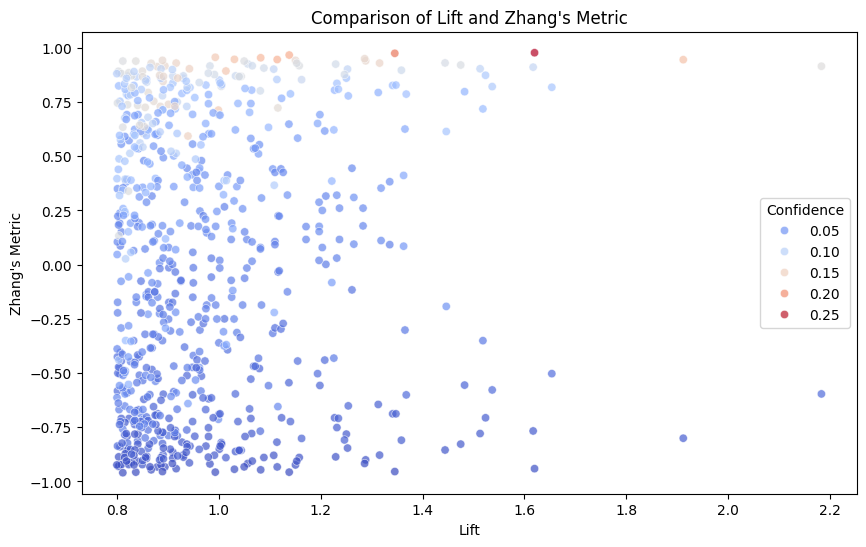

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=rules['lift'], y=rules['zhang'], hue=rules['confidence'], palette='coolwarm', alpha=0.7)
plt.xlabel('Lift')
plt.ylabel("Zhang's Metric")
plt.title("Comparison of Lift and Zhang's Metric")
plt.legend(title="Confidence")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_42272\785151723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequent_itemsets['support'].head(10), y=frequent_itemsets['itemsets'].head(10).astype(str), palette='viridis')


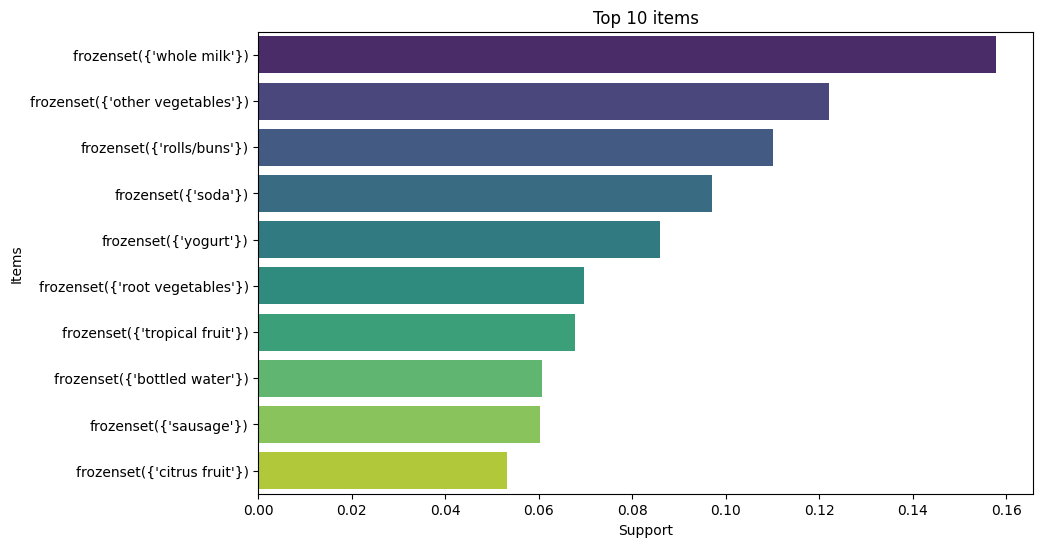

In [10]:
plt.figure(figsize=(10,6))
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
sns.barplot(x=frequent_itemsets['support'].head(10), y=frequent_itemsets['itemsets'].head(10).astype(str), palette='viridis')
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Top 10 items')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_42272\3448605856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rules['lift'].head(10), y=rules['antecedents'].head(10).astype(str) + " -> " + rules['consequents'].head(10).astype(str), palette='coolwarm')


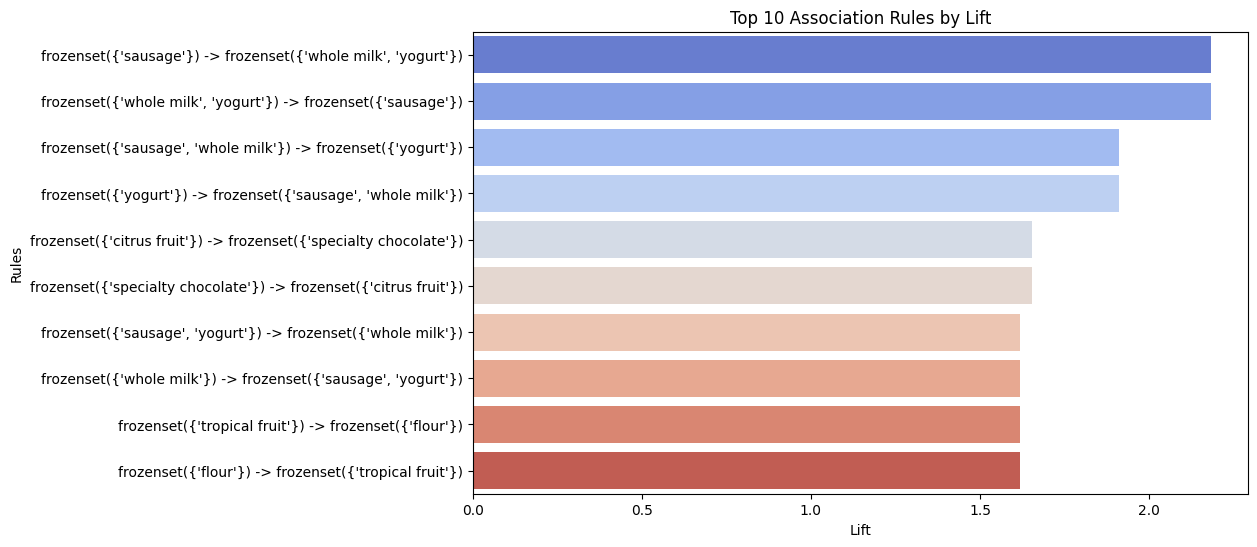

In [11]:
plt.figure(figsize=(10,6))
rules.sort_values(by='lift', ascending=False, inplace=True)
sns.barplot(x=rules['lift'].head(10), y=rules['antecedents'].head(10).astype(str) + " -> " + rules['consequents'].head(10).astype(str), palette='coolwarm')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Association Rules by Lift')
plt.show()

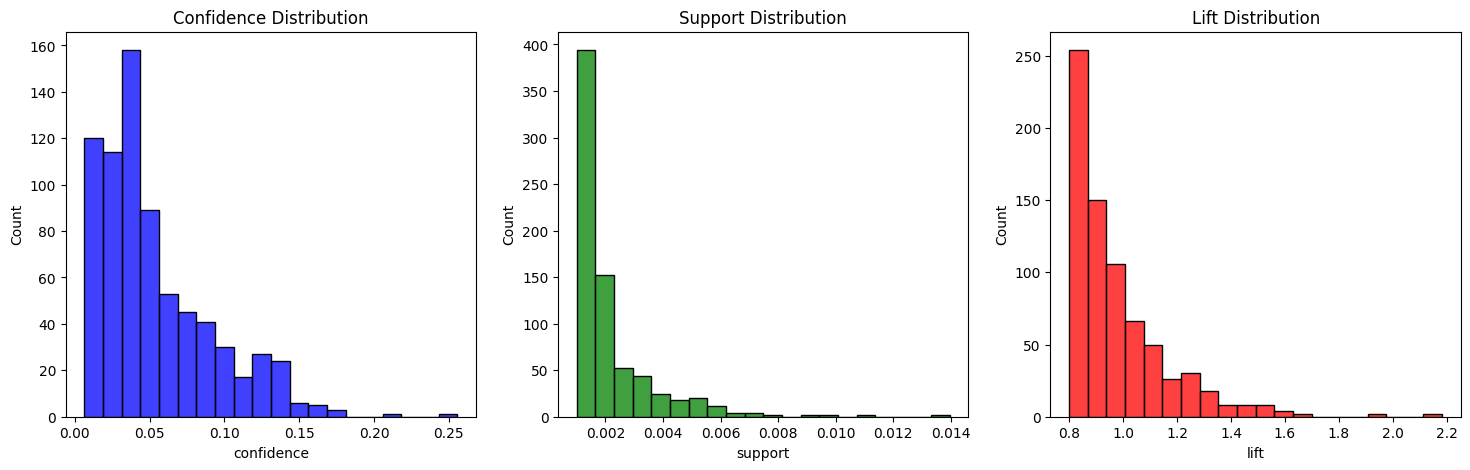

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(rules['confidence'], bins=20, ax=axes[0], color='blue')
axes[0].set_title('Confidence Distribution')
sns.histplot(rules['support'], bins=20, ax=axes[1], color='green')
axes[1].set_title('Support Distribution')
sns.histplot(rules['lift'], bins=20, ax=axes[2], color='red')
axes[2].set_title('Lift Distribution')
plt.show()

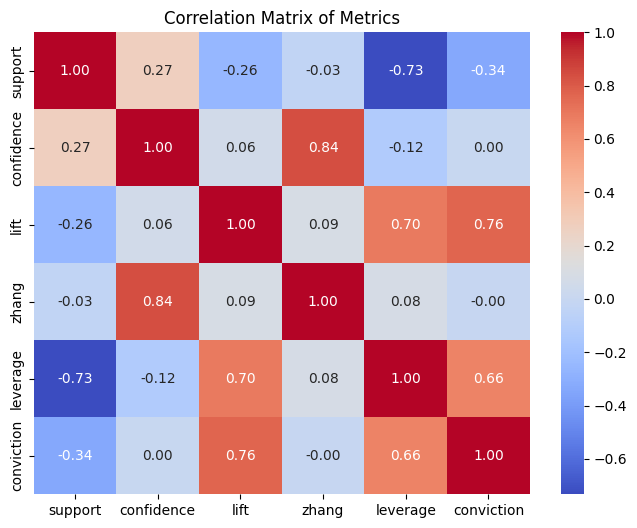

In [13]:
plt.figure(figsize=(8,6))
corr_matrix = rules[['support', 'confidence', 'lift', 'zhang', 'leverage', 'conviction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Metrics')
plt.show()

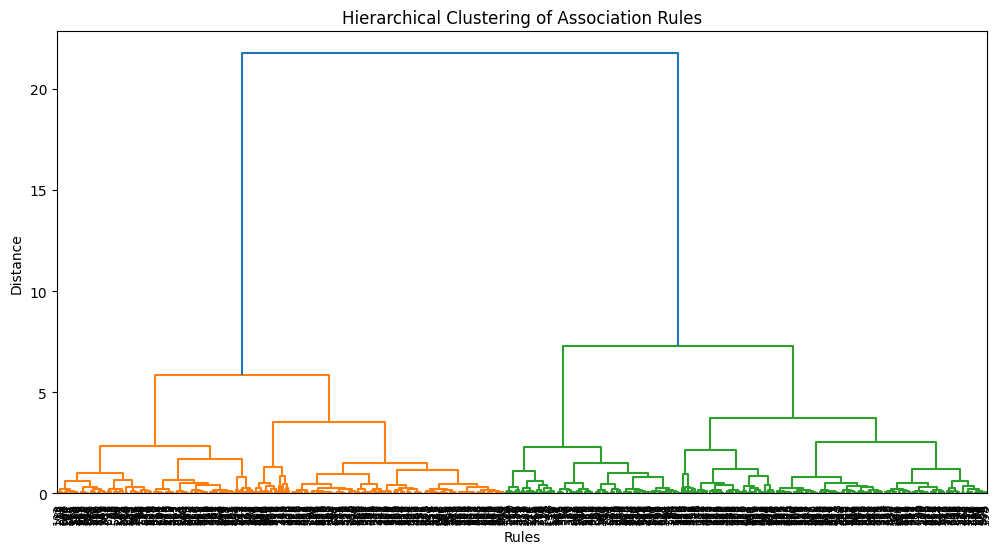

In [14]:
plt.figure(figsize=(12,6))
dist_matrix = sch.linkage(rules[['support', 'confidence', 'lift', 'zhang', 'leverage', 'conviction']], method='ward')
sch.dendrogram(dist_matrix, labels=rules.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering of Association Rules')
plt.xlabel('Rules')
plt.ylabel('Distance')
plt.show()

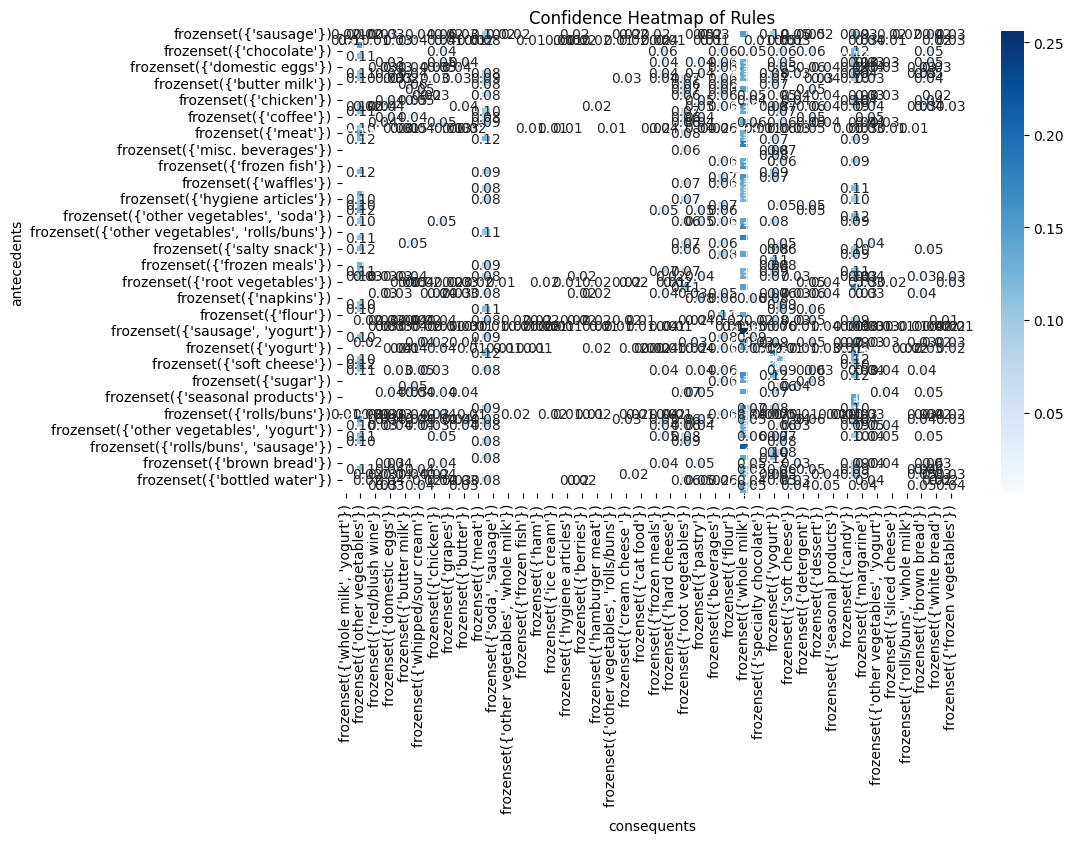

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(rules.pivot(index='antecedents', columns='consequents', values='confidence'), annot=True, cmap='Blues', fmt='.2f')
plt.title('Confidence Heatmap of Rules')
plt.show()

In [19]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
731,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701,-0.596293
730,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014,0.915279
728,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231,0.945453
733,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727,-0.800641
247,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,0.417500,-0.502831
